### ADTA 5120 Final Project EDA
Marissa McKee

This project is based on the data set called ERIMdata.xlsx that includes about 3,000 households in two midwestern cities in the United States. The data contain demographic information such as household incomes, number of household members, education levels of the heads of households as well as information on the purchases of several retail products such as frozen dinners and yogurt. The data were collected between 1985 and 1988 by a marketing research firm, AC Nielsen. 


Your assignment is first to propose a business analytics plan based on the CRISP-DM framework and identify and complete the appropriate tasks for each of the six CRISP-DM phases. The project deliverables include a final written report and an oral presentation that should follow the outline shown below. 

In [1]:
# Import packages
import random 
import pandas as pd
import numpy as np
import csv
from pandasql import sqldf
import statistics as stat
from statistics import mean
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

### Data Dictionary
HHID: The household's identification number 

ResType:          Types of residence: 1  for Apartment, 2 for Condo, 3 for Single Family, 4 for Multiple Family, 5 for Mobile, and 6 for  Other. 

ResStatus:        Residence status: 1 for owned home, 2 for rented, and 3 for other. 

HHlnc:   The average annual income of a household; there are  14 categories for this variable. 

HHNbr:            The number of members in the household. 

MWrkHrs:      The average hours worked each week by the male head of household. 

MEdu:  Education level of the male head of household: values less than 9 imply varying education levels prior to a college degree, 9 for graduated from college, 10 for attended graduate school, and 11  for post-graduate  degree. 

FWrkHrs:  The average hours worked each week by the female head of household.  

FEdu:  Education level of the female head of household. See MEdu for detail. 

FBirth:              The birth year of the female head of household. 

F  Rel:               Relationship within the household: 1  for female head of household, 2 for male head of household, 3 for daughter, 4 for son, and 5 for other. 

MBirth:           The birth year of the male head of household. 

M  Rel:             Relationship within the household: 1 for female head of household, 2 for male head of household, 3 for 
daughter, 4 for son, and 5 for other. 

Cable:              Whether or not the household has cable; 1   if yes, 0 otherwise.  

Cats:                Whether or not the household has cats; 1   if yes, 0 otherwise.  

Dogs:               Whether or not the household has dogs; 1  if yes, 0 otherwise.  

YogExp:          A household's yogurt expenditures (in$) 

DinExp:           A household's frozen  dinner expenditures (in$) 

In [2]:
# Import ERIMData.csv  
file = 'ERIMData.csv'
df = pd.read_csv(file, sep = ',')
df.head()

,HH_ID,ResType,ResStatus,HHInc,HHNbr,MWrkHrs,MEdu,FWrkHrs,FEdu,FBirth,F_Rel,MBirth,M_Rel,Cable,Cats,Dogs,YogExp,DinExp
0,1100032,3,1,11,2,40,8,40,9,1938,1,1935,2,1,0,0,3.07,0.00
1,1100107,1,2,3,3,0,0,40,7,1942,1,0,0,1,0,1,0.00,90.70
2,1100131,3,1,9,4,40,9,40,8,1949,1,1949,2,1,0,0,330.12,669.18
3,1100172,1,2,2,1,0,0,0,9,1921,1,0,0,1,0,0,1.78,0.00
4,1100180,3,1,8,4,40,9,38,8,1946,1,1937,2,1,0,0,23.44,0.00


In [3]:
# Handle 0 values for M/F birth year columns
df['FBirth'] = np.where((df.FBirth == 0),df['MBirth'],df.FBirth)
df['MBirth'] = np.where((df.MBirth == 0),df['FBirth'],df.MBirth)

In [4]:
# Create dummy variables for HHInc
df['HHIn1'] = np.where((df.HHInc == 1),1,0)
df['HHIn2'] = np.where((df.HHInc == 2),1,0)
df['HHIn3'] = np.where((df.HHInc == 3),1,0)
df['HHIn4'] = np.where((df.HHInc == 4),1,0)
df['HHIn5'] = np.where((df.HHInc == 5),1,0)
df['HHIn6'] = np.where((df.HHInc == 6),1,0)
df['HHIn7'] = np.where((df.HHInc == 7),1,0)
df['HHIn8'] = np.where((df.HHInc == 8),1,0)
df['HHIn9'] = np.where((df.HHInc == 9),1,0)
df['HHIn10'] = np.where((df.HHInc == 10),1,0)
df['HHIn11'] = np.where((df.HHInc == 11),1,0)
df['HHIn12'] = np.where((df.HHInc == 12),1,0)
df['HHIn13'] = np.where((df.HHInc == 13),1,0)

In [5]:
# Create dummy variables for ResType
df['ResType1'] = np.where((df.ResType == 1),1,0)
df['ResType2'] = np.where((df.ResType == 2),1,0)
df['ResType3'] = np.where((df.ResType == 3),1,0)
df['ResType4'] = np.where((df.ResType == 4),1,0)
df['ResType5'] = np.where((df.ResType == 5),1,0)

In [6]:
# Create dummy variables for ResStatus
df['ResStatus1'] = np.where((df.ResStatus == 1),1,0)
df['ResStatus2'] = np.where((df.ResStatus == 2),1,0)

In [7]:
# Create dummy variables for MEdu
df['MUndergrad'] = np.where((df.MEdu == 9),1,0)
df['MGrad'] = np.where((df.MEdu > 9),1,0)

In [8]:
# Create dummy variables for FEdu
df['FUndergrad'] = np.where((df.FEdu == 9),1,0)
df['FGrad'] = np.where((df.FEdu > 9),1,0)

In [9]:
# Create dummy variables for FEdu
df['Married'] = np.where((df.M_Rel > 0),1,0)
df['Married'] = np.where((df.F_Rel > 0),1,0)

In [10]:
# Create dummy variables for YogExp
df['BuyYog'] = np.where((df.YogExp != 0),1,0)

In [11]:
# Create dummy variables for FEdu
df['BuyDin'] = np.where((df.DinExp != 0),1,0)

In [12]:
# Add column for age of male and female head of household
df['FAge']=1988-df['FBirth']
df['MAge']=1988-df['MBirth']

In [13]:
df.head(30)

,HH_ID,ResType,ResStatus,HHInc,HHNbr,MWrkHrs,MEdu,FWrkHrs,FEdu,FBirth,...,ResStatus2,MUndergrad,MGrad,FUndergrad,FGrad,Married,BuyYog,BuyDin,FAge,MAge
0,1100032,3,1,11,2,40,8,40,9,1938,...,0,0,0,1,0,1,1,0,50,53
1,1100107,1,2,3,3,0,0,40,7,1942,...,1,0,0,0,0,1,0,1,46,46
2,1100131,3,1,9,4,40,9,40,8,1949,...,0,1,0,0,0,1,1,1,39,39
3,1100172,1,2,2,1,0,0,0,9,1921,...,1,0,0,1,0,1,1,0,67,67
4,1100180,3,1,8,4,40,9,38,8,1946,...,0,1,0,0,0,1,1,0,42,51
5,1100198,1,2,2,1,0,0,0,5,1903,...,1,0,0,0,0,1,0,0,85,85
6,1100255,3,1,2,1,0,0,0,3,1921,...,0,0,0,0,0,1,1,1,67,67
7,1100289,3,1,3,2,0,9,0,5,1916,...,0,1,0,0,0,1,1,0,72,78
8,1100297,3,1,7,2,20,5,12,5,1925,...,0,0,0,0,0,1,0,0,63,66
9,1100313,3,1,6,3,0,0,40,8,1951,...,0,0,0,0,0,1,1,0,37,37


In [14]:
# Descriptive stats
df.describe()

,HH_ID,ResType,ResStatus,HHInc,HHNbr,MWrkHrs,MEdu,FWrkHrs,FEdu,FBirth,...,ResStatus2,MUndergrad,MGrad,FUndergrad,FGrad,Married,BuyYog,BuyDin,FAge,MAge
count,3.189000e+03,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,...,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000
mean,1.579661e+06,2.960489,1.162747,6.006585,2.731264,26.344622,5.378175,22.112574,6.647852,1937.617749,...,0.137661,0.129821,0.094387,0.141424,0.090938,0.969897,0.814989,0.333333,50.382251,52.111634
std,4.994436e+05,0.645664,0.401743,2.922507,1.342143,22.724016,3.619787,19.514887,2.394154,15.080431,...,0.344598,0.336159,0.292412,0.348513,0.287565,0.170899,0.388367,0.471478,15.080431,15.306819
min,1.100032e+06,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1894.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,21.000000
25%,1.124446e+06,3.000000,1.000000,4.000000,2.000000,0.000000,3.000000,0.000000,5.000000,1926.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,38.000000,39.000000
50%,1.150524e+06,3.000000,1.000000,6.000000,2.000000,40.000000,6.000000,25.000000,7.000000,1939.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,49.000000,51.000000
75%,2.125203e+06,3.000000,1.000000,8.000000,4.000000,44.000000,8.000000,40.000000,8.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,62.000000,64.000000
max,2.170639e+06,6.000000,3.000000,14.000000,8.000000,80.000000,11.000000,90.000000,11.000000,1967.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,94.000000,98.000000


### Observations so far...
The average age of the female and male head of the households are 50 and 52 respectively. 

36% of households own cats

48% of households own dogs

65% of households own cable

The median of a households yogurt expenditure is $10.33

The median of a households frozen dinner expenditure is $0

The average hours a week the male head of the household works is 26

The average hours a week the female head of the household works is 22

81% of household buy yogurt

33% of households buy frozen dinners


In [15]:
# (row count,column count)
df.shape

(3189, 47)

In [40]:
# Check dtypes
df.dtypes

HH_ID           int64
ResType         int64
ResStatus       int64
HHInc           int64
HHNbr           int64
MWrkHrs         int64
MEdu            int64
FWrkHrs         int64
FEdu            int64
FBirth          int64
F_Rel           int64
MBirth          int64
M_Rel           int64
Cable           int64
Cats            int64
Dogs            int64
YogExp        float64
DinExp        float64
HHIn1           int32
HHIn2           int32
HHIn3           int32
HHIn4           int32
HHIn5           int32
HHIn6           int32
HHIn7           int32
HHIn8           int32
HHIn9           int32
HHIn10          int32
HHIn11          int32
HHIn12          int32
HHIn13          int32
ResType1        int32
ResType2        int32
ResType3        int32
ResType4        int32
ResType5        int32
ResStatus1      int32
ResStatus2      int32
MUndergrad      int32
MGrad           int32
FUndergrad      int32
FGrad           int32
Married         int32
BuyYog          int32
BuyDin          int32
FAge      

In [16]:
# Check for nulls
df.isnull().any()

HH_ID         False
ResType       False
ResStatus     False
HHInc         False
HHNbr         False
MWrkHrs       False
MEdu          False
FWrkHrs       False
FEdu          False
FBirth        False
F_Rel         False
MBirth        False
M_Rel         False
Cable         False
Cats          False
Dogs          False
YogExp        False
DinExp        False
HHIn1         False
HHIn2         False
HHIn3         False
HHIn4         False
HHIn5         False
HHIn6         False
HHIn7         False
HHIn8         False
HHIn9         False
HHIn10        False
HHIn11        False
HHIn12        False
HHIn13        False
ResType1      False
ResType2      False
ResType3      False
ResType4      False
ResType5      False
ResStatus1    False
ResStatus2    False
MUndergrad    False
MGrad         False
FUndergrad    False
FGrad         False
Married       False
BuyYog        False
BuyDin        False
FAge          False
MAge          False
dtype: bool

In [17]:
# Column names
df.columns

Index(['HH_ID', 'ResType', 'ResStatus', 'HHInc', 'HHNbr', 'MWrkHrs', 'MEdu',
       'FWrkHrs', 'FEdu', 'FBirth', 'F_Rel', 'MBirth', 'M_Rel', 'Cable',
       'Cats', 'Dogs', 'YogExp', 'DinExp', 'HHIn1', 'HHIn2', 'HHIn3', 'HHIn4',
       'HHIn5', 'HHIn6', 'HHIn7', 'HHIn8', 'HHIn9', 'HHIn10', 'HHIn11',
       'HHIn12', 'HHIn13', 'ResType1', 'ResType2', 'ResType3', 'ResType4',
       'ResType5', 'ResStatus1', 'ResStatus2', 'MUndergrad', 'MGrad',
       'FUndergrad', 'FGrad', 'Married', 'BuyYog', 'BuyDin', 'FAge', 'MAge'],
      dtype='object')

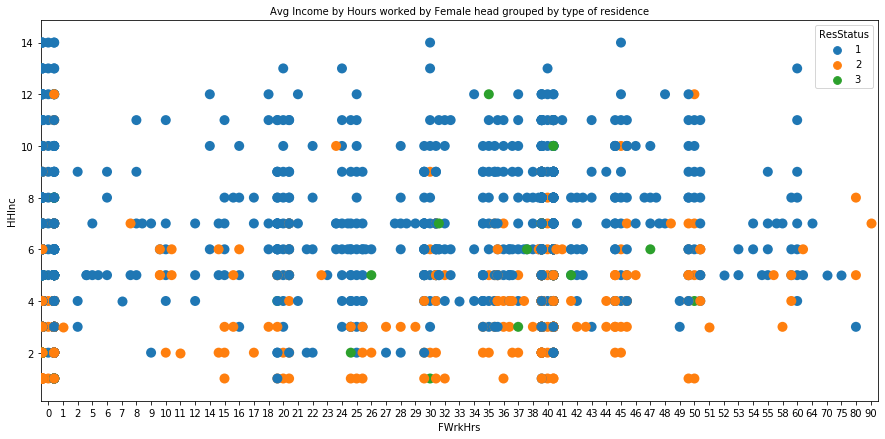

In [18]:
# Displays results based on residence status, household income, and hours worked by female lead
results = df.groupby(['ResStatus']).head(1000)
plt.figure(figsize=(15,7))
g = sns.swarmplot(x='FWrkHrs', y='HHInc', hue='ResStatus', 
                  data=results, size=10)
g.tick_params(labelsize=10)
plt.title('Avg Income by Hours worked by Female head grouped by type of residence',fontsize=10)
plt.show()

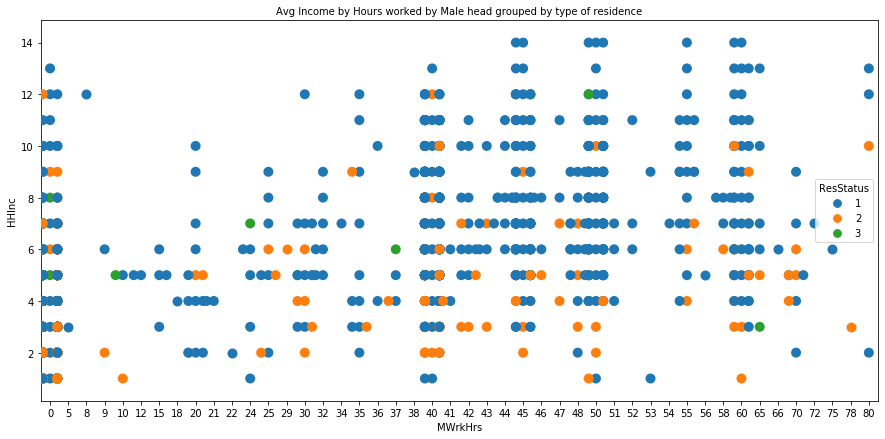

In [19]:
# Displays results based on residence status, household income, and hours worked by male lead
results = df.groupby(['ResStatus']).head(1000)
plt.figure(figsize=(15,7))
g = sns.swarmplot(x='MWrkHrs', y='HHInc', hue='ResStatus', 
                  data=results, size=10)
g.tick_params(labelsize=10)
plt.title('Avg Income by Hours worked by Male head grouped by type of residence',fontsize=10)
plt.show()

C:\Users\mckee\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\mckee\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


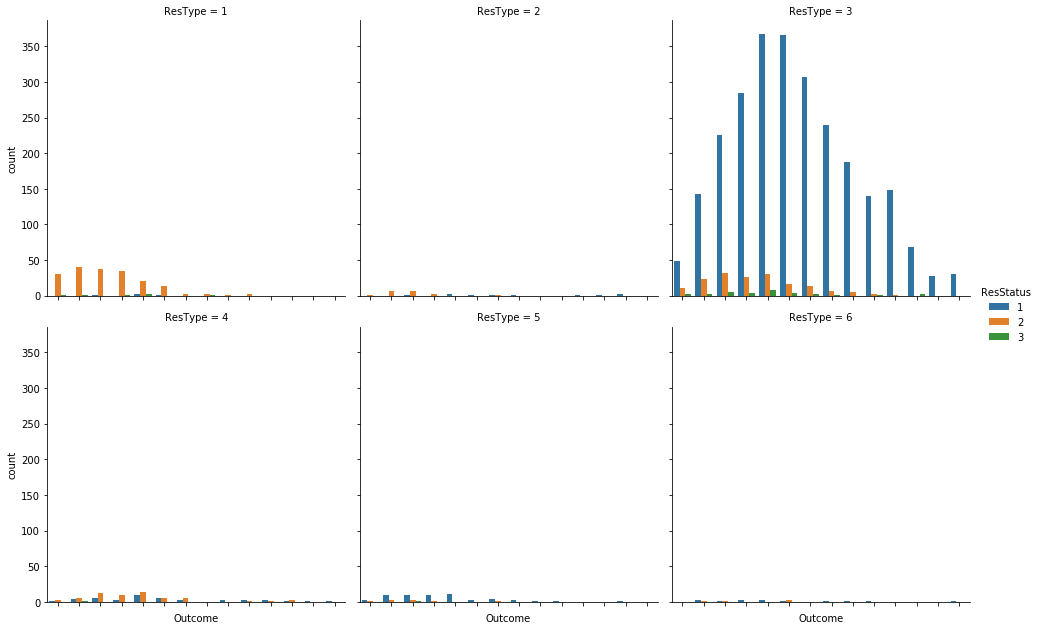

In [20]:
# Displays the household income by restype and resstatus
g = sns.factorplot(x='HHInc', hue='ResStatus', col='ResType', 
               col_wrap=3, data=df, kind='count', size=4.5)

g.set_xticklabels(rotation=90)
g.set_xlabels('Outcome')

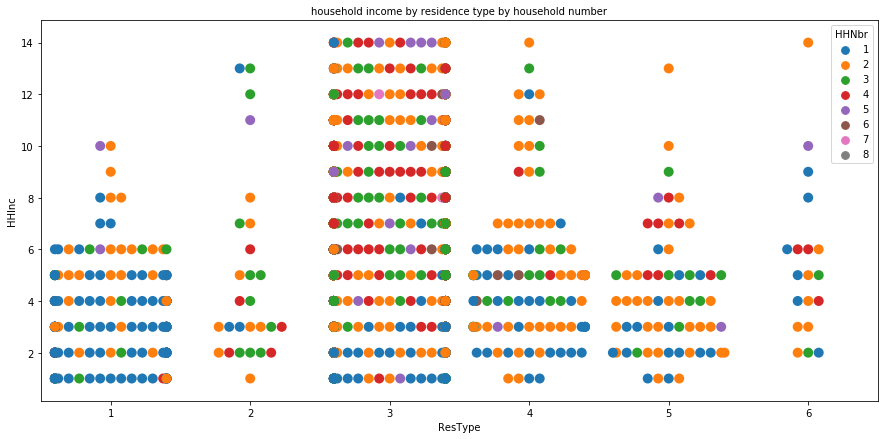

In [21]:
# Displays results based on # of person in household, residence type, and household income
results = df.groupby(['HHNbr']).head(1000)
plt.figure(figsize=(15,7))
g = sns.swarmplot(x='ResType', y='HHInc', hue='HHNbr', 
                  data=results, size=10)
g.tick_params(labelsize=10)
plt.title('household income by residence type by household number',fontsize=10)
plt.show()

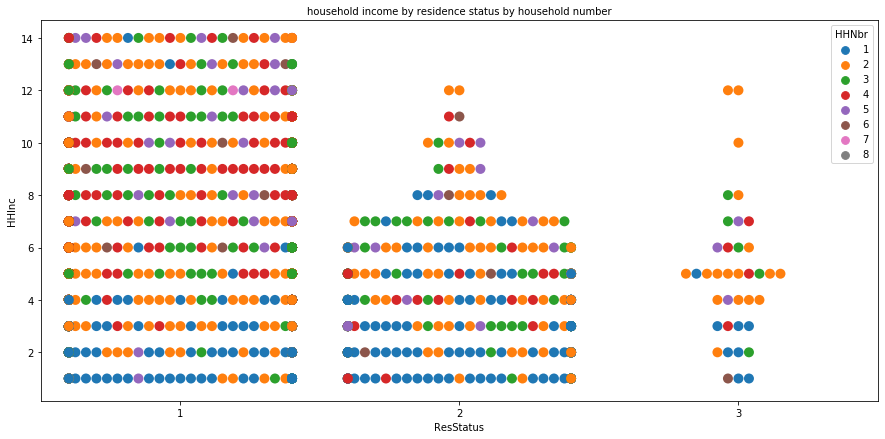

In [22]:
# Displays results based on # of person in household, residence type, and household income
results = df.groupby(['HHNbr']).head(1000)
plt.figure(figsize=(15,7))
g = sns.swarmplot(x='ResStatus', y='HHInc', hue='HHNbr', 
                  data=results, size=10)
g.tick_params(labelsize=10)
plt.title('household income by residence status by household number',fontsize=10)
plt.show()

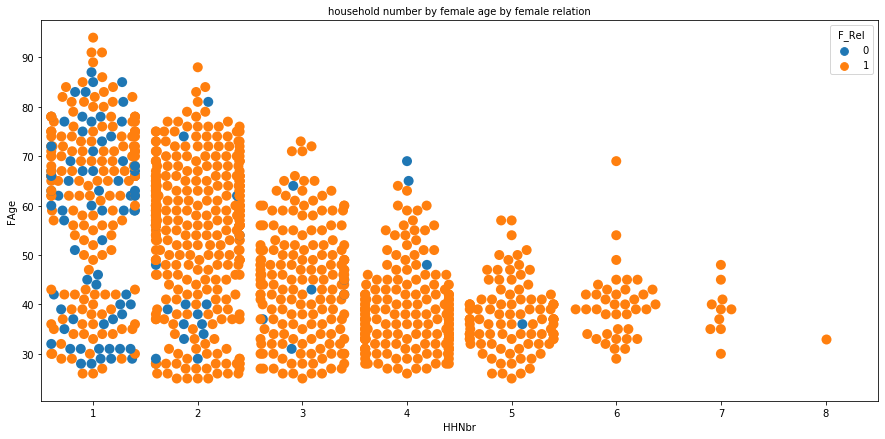

In [23]:
results = df.groupby(['F_Rel']).head(1000)
plt.figure(figsize=(15,7))
g = sns.swarmplot(x='HHNbr', y='FAge', hue='F_Rel', 
                  data=results, size=10)
g.tick_params(labelsize=10)
plt.title('household number by female age by female relation',fontsize=10)
plt.show()

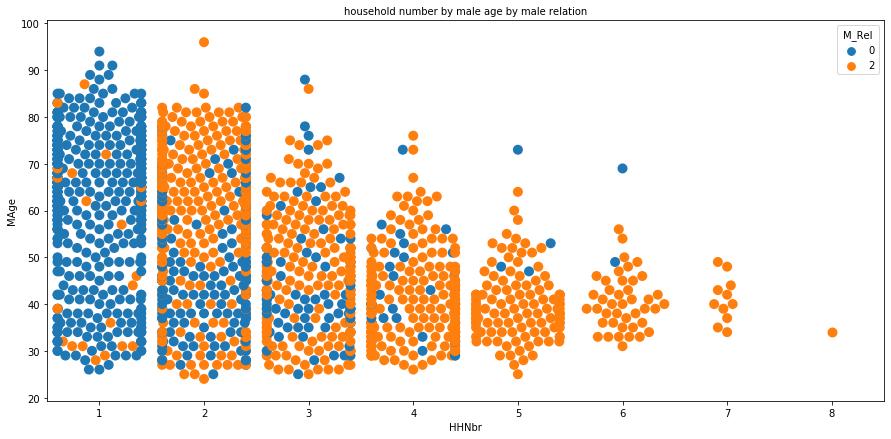

In [24]:
results = df.groupby(['M_Rel']).head(1000)
plt.figure(figsize=(15,7))
g = sns.swarmplot(x='HHNbr', y='MAge', hue='M_Rel', 
                  data=results, size=10)
g.tick_params(labelsize=10)
plt.title('household number by male age by male relation',fontsize=10)
plt.show()

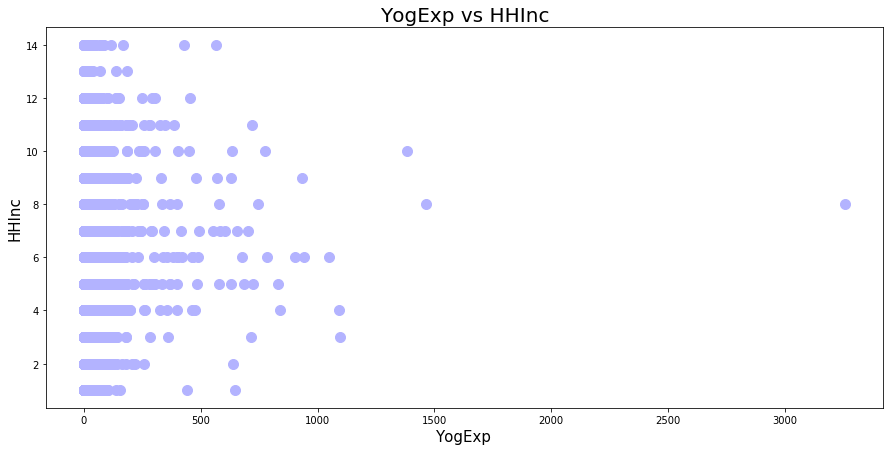

In [25]:
# Scatter plot
plt.figure(figsize=(15,7))
plt.scatter(df['YogExp'],df['HHInc'],s=100,marker='o',color='#b3b3ff')
plt.title('YogExp vs HHInc',fontsize=20)  
plt.xlabel('YogExp',fontsize=15)  
plt.ylabel('HHInc',fontsize=15)  
plt.show()

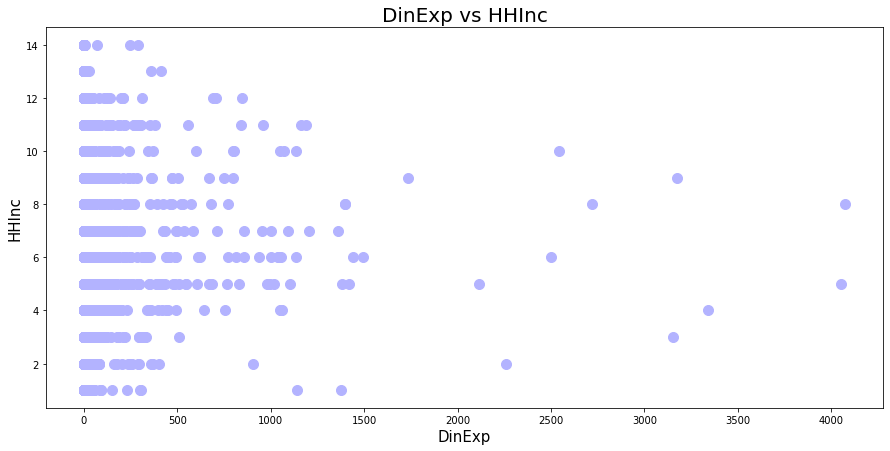

In [26]:
# Scatter plot
plt.figure(figsize=(15,7))
plt.scatter(df['DinExp'],df['HHInc'],s=100,marker='o',color='#b3b3ff')
plt.title('DinExp vs HHInc',fontsize=20)  
plt.xlabel('DinExp',fontsize=15)  
plt.ylabel('HHInc',fontsize=15)  
plt.show()

Text(0, 0.5, 'Frequency')

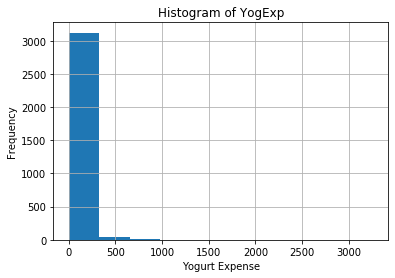

In [47]:
# Histogram of dependent variable
df.YogExp.hist()
plt.title('Histogram of YogExp')
plt.xlabel('Yogurt Expense')
plt.ylabel('Frequency')

#### Explore Dependent Variables
Visualizations for the dummy variable BuyYog and BuyDin are below. 
- 81% of households buy yogurt
- 33% of households buy frozen dinners

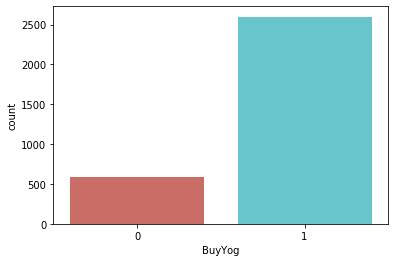

In [41]:
# Visualize results of BuyYog dummy variable
sns.countplot(x='BuyYog', data=df, palette='hls')
plt.show()

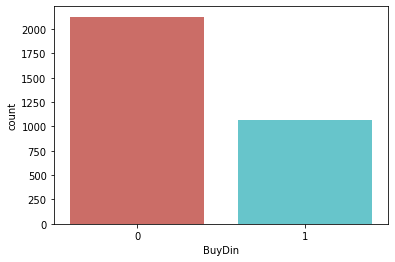

In [42]:
# Visualize results of BuyDin dummy variable
sns.countplot(x='BuyDin', data=df, palette='hls')
plt.show()

#### Correlation Matrices in Relation to YogExp an DinExp
Visualized are ethe correlation matrices below. 
- YogExp and DinExp are highly correlated 
- YogExp is not highly correlated with any of the independent variables
- DinExp is not highly correlated with any of the indpendent variables

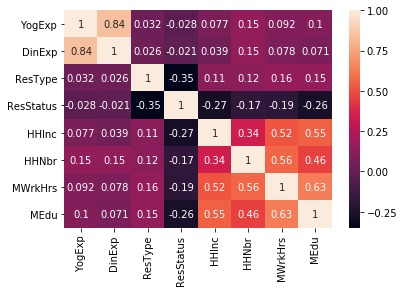

In [32]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT YogExp
, DinExp
, ResType
, ResStatus
, HHInc
, HHNbr
, MWrkHrs
, MEdu
FROM df;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
sns.heatmap(corrMatrix, annot=True)

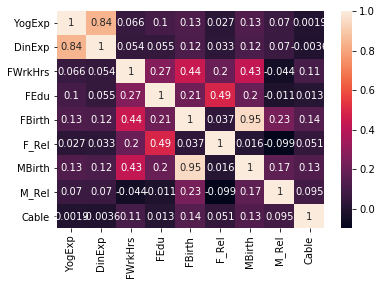

In [33]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT YogExp
, DinExp
, FWrkHrs
, FEdu
, FBirth
, F_Rel
, MBirth
, M_Rel
, Cable
FROM df;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
sns.heatmap(corrMatrix, annot=True)

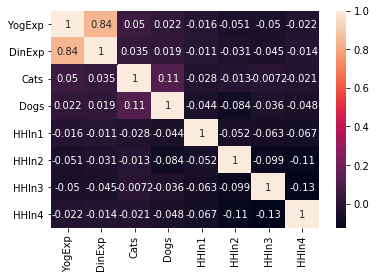

In [43]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT YogExp
, DinExp
, Cats
, Dogs
, HHIn1
, HHIn2
, HHIn3
, HHIn4
FROM df;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
sns.heatmap(corrMatrix, annot=True)

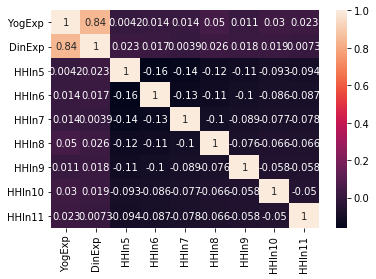

In [36]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT YogExp
, DinExp
, HHIn5
, HHIn6
, HHIn7
, HHIn8
, HHIn9
, HHIn10
, HHIn11
FROM df;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
sns.heatmap(corrMatrix, annot=True)

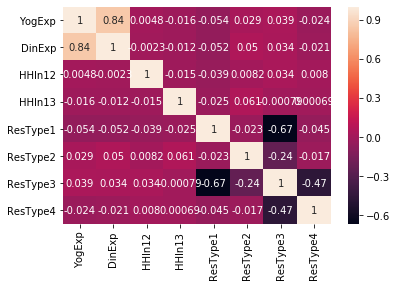

In [37]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT YogExp
, DinExp
, HHIn12
, HHIn13
, ResType1
, ResType2
, ResType3
, ResType4
FROM df;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
sns.heatmap(corrMatrix, annot=True)

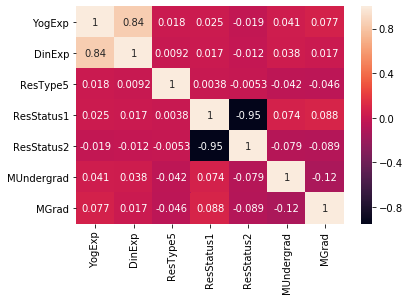

In [38]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT YogExp
, DinExp
, ResType5
, ResStatus1
, ResStatus2
, MUndergrad
, MGrad
FROM df;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
sns.heatmap(corrMatrix, annot=True)

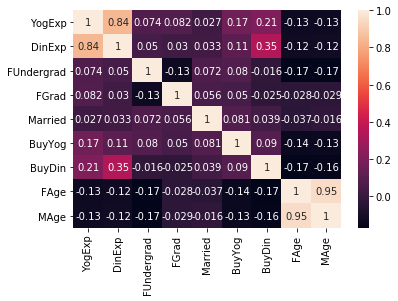

In [39]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT YogExp
, DinExp
, FUndergrad
, FGrad
, Married
, BuyYog
, BuyDin
, FAge
, MAge
FROM df;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
sns.heatmap(corrMatrix, annot=True)

#### Export the clean csv file

In [29]:
# Export clean data to csv file to use in analysis
df.to_csv(r'ERIMDataClean.csv', index = False)